<a href="https://colab.research.google.com/github/knishaa01/-Banking-Churn-Analysis-Modeling/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **main problem in the Churn_Modelling dataset** is to solve a **classification problem**:

👉 **Problem Statement:**
“Predict whether a customer will **exit (churn)** the bank or **stay** based on their personal details, account information, and activity.”

### Why is this a problem?

* Banks lose revenue when customers leave (churn).
* Retaining old customers is cheaper than acquiring new ones.
* By predicting churn in advance, banks can take action (special offers, better service, personalized support) to retain customers.

### Main Challenges in this dataset:

1. **Imbalanced Data** – The number of customers who leave (Exited = 1) is usually much smaller than those who stay (Exited = 0). This makes prediction harder.
2. **Feature Importance** – Not all features equally affect churn (e.g., “Surname” has no meaning, but “CreditScore”, “Balance”, “IsActiveMember” are important).
3. **Non-linear Relationships** – Customer churn depends on a mix of factors like age, geography, and tenure together, not just single values.
4. **Business Interpretability** – The bank needs not just accuracy, but also **why** customers are likely to churn.

👉 **In short:**
The dataset’s **main problem** is **predicting customer churn (yes/no)** so that banks can identify at-risk customers and improve retention strategies.

In [117]:
 import pandas as pd

In [118]:
data=pd.read_csv("/content/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [119]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [121]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [122]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [123]:
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [124]:
data.shape

(10000, 14)

In [125]:
print('Number of row', data.shape[0])
print('Number of columns', data.shape[1])

Number of row 10000
Number of columns 14


In [126]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [127]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [128]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [129]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [130]:
data=data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [131]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [132]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [133]:
data=pd.get_dummies(data,drop_first=True)

In [134]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [135]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [136]:
import seaborn as sns

<Axes: ylabel='count'>

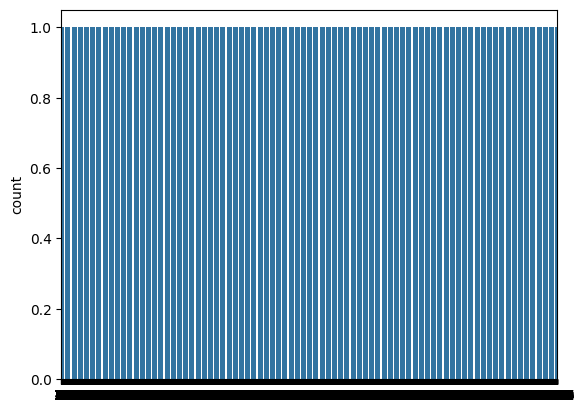

In [213]:
#sns.countplot(data['Exited'])
sns.countplot(data['EstimatedSalary'])

In [138]:
x=data.drop('Exited',axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [139]:
y=data['Exited']
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [140]:
from imblearn.over_sampling import SMOTE

In [141]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [142]:
x_res.value_counts()

CreditScore  Age  Tenure  Balance        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male
850          81   5       0.000000       2              1          1               44827.470000     False              False            True           1
350          39   0       109733.200000  2              0          0               123602.110000    True               False            True           1
             40   0       111098.850000  1              1          1               172321.210000    False              False            False          1
             51   10      0.000000       1              1          1               125823.790000    False              False            True           1
             54   1       152677.480000  1              1          1               191973.490000    False              True             True           1
                                                                                                                                                      ..
359          44   6       128747.690000  1              1          0               146955.710000    False              False            False          1
358          52   8       143542.360000  3              1          0               141959.110000    False              True             False          1
356          56   3       163179.894523  1              0          0               169759.067915    True               False            True           1
355          40   0       111119.321059  1              1          0               172347.474393    False              False            False          1
354          59   3       0.000000       1              0          0               113792.741467    False              False            True           1
Name: count, Length: 15926, dtype: int64

In [143]:
y_res.value_counts()

,count
Exited,
1,7963
0,7963


In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42)

In [146]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
13555,354,59,3,0.000000,1,0,0,113792.741467,False,False,True
1665,749,42,1,129776.720000,2,0,1,143538.510000,False,False,True
14878,668,49,6,211520.767824,1,0,1,76770.587527,False,True,True
7471,658,55,8,119327.930000,1,0,1,119439.660000,True,False,False
2582,656,46,5,113402.140000,2,1,1,138849.060000,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
13418,795,46,2,0.000000,1,0,0,161061.991949,False,True,False
5390,735,38,1,0.000000,3,0,0,92220.120000,False,False,False
860,667,43,8,190227.460000,1,1,0,97508.040000,False,False,True
15795,647,29,4,207257.547429,1,0,0,189111.121077,False,True,True


In [147]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
13555,354,59,3,0.000000,1,0,0,113792.741467,False,False,True
1665,749,42,1,129776.720000,2,0,1,143538.510000,False,False,True
14878,668,49,6,211520.767824,1,0,1,76770.587527,False,True,True
7471,658,55,8,119327.930000,1,0,1,119439.660000,True,False,False
2582,656,46,5,113402.140000,2,1,1,138849.060000,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
13418,795,46,2,0.000000,1,0,0,161061.991949,False,True,False
5390,735,38,1,0.000000,3,0,0,92220.120000,False,False,False
860,667,43,8,190227.460000,1,1,0,97508.040000,False,False,True
15795,647,29,4,207257.547429,1,0,0,189111.121077,False,True,True


In [148]:
x_test.size

35046

In [149]:
x_train.size

140140

In [150]:
y_train

,Exited
13555,1
1665,0
14878,1
7471,0
2582,0
...,...
13418,1
5390,1
860,1
15795,1


In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)


In [153]:
sc=StandardScaler()
x_test=sc.fit_transform(x_test)

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
log=LogisticRegression()
log

LogisticRegression()

In [156]:
log.fit(x_train,y_train)

LogisticRegression()

In [157]:
y_predi=log.predict(x_test)

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
accuracy_score(y_test,y_predi)

0.7718141870684243

In [160]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [161]:
precision_score(y_test,y_predi)

0.7562034739454094

In [162]:
recall_score(y_test,y_predi)

0.784932388924662

In [163]:
f1_score(y_test,y_predi)

0.7703001579778831

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
train_test_split(x,y,test_size=20,random_state=42,stratify=y)

[      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 18            587   45       6       0.00              1          0   
 1762          758   34       1  154139.45              1          1   
 1391          775   38       4  125212.65              2          1   
 8435          638   43       3  145860.98              1          1   
 9713          714   40       9   46520.69              1          1   
 ...           ...  ...     ...        ...            ...        ...   
 46            829   27       9  112045.67              1          1   
 856           567   49       5  134956.02              1          1   
 3910          620   70       3   87926.24              2          1   
 4921          526   33       8  114634.63              2          1   
 6206          802   51       7       0.00              1          0   
 
       IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
 18                 0        158684.81              Fals

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [168]:
x_train

array([[-3.21991451,  1.8221968 , -0.65572772, ..., -0.75109905,
        -0.63087467,  0.80559138],
       [ 1.09836631,  0.11047401, -1.39150111, ..., -0.75109905,
        -0.63087467,  0.80559138],
       [ 0.21284543,  0.81530104,  0.44793237, ..., -0.75109905,
         1.58510088,  0.80559138],
       ...,
       [ 0.20191307,  0.21116359,  1.18370577, ..., -0.75109905,
        -0.63087467,  0.80559138],
       [-0.01673406, -1.19849047, -0.28784102, ..., -0.75109905,
         1.58510088,  0.80559138],
       [ 0.52988377,  1.01668019, -1.39150111, ...,  1.33138232,
        -0.63087467,  0.80559138]])

In [169]:
x_test

array([[-1.24906181, -1.17975064,  0.04110593, ..., -0.74542878,
        -0.6289135 , -1.19591218],
       [-0.47202734,  0.01219002, -0.32369492, ...,  1.34150979,
        -0.6289135 , -1.19591218],
       [ 0.33783958, -0.98109386,  1.50030934, ..., -0.74542878,
         1.59004377, -1.19591218],
       ...,
       [ 0.09706834, -0.28579514,  0.40590679, ..., -0.74542878,
        -0.6289135 , -1.19591218],
       [ 1.10392991,  1.10480228,  0.40590679, ...,  1.34150979,
        -0.6289135 , -1.19591218],
       [ 0.15178907, -1.4777358 , -0.68849577, ...,  1.34150979,
        -0.6289135 ,  0.8361818 ]])

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
log=LogisticRegression()
log

LogisticRegression()

In [172]:
log.fit(x_train,y_train)

LogisticRegression()

In [173]:
y_pred1=log.predict(x_test)

In [174]:
from sklearn.metrics import accuracy_score

In [175]:
accuracy_score(y_test,y_pred1)

0.7718141870684243

In [176]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [177]:
precision_score(y_test,y_pred1)

0.7562034739454094

In [178]:
f1_score(y_test,y_pred1)

0.7703001579778831

In [179]:
from sklearn import svm

In [180]:
svm=svm.SVC()

In [181]:
svm.fit(x_train,y_train)

SVC()

In [182]:
y_pred2=svm.predict(x_test)

In [183]:
accuracy_score(y_test,y_pred2)

0.8408662900188324

In [184]:
precision_score(y_test,y_pred2)

0.8427260812581914

In [185]:
recall_score(y_test,y_pred2)

0.8280746941403735

In [186]:
f1_score(y_test,y_pred2)

0.8353361481000324

In [187]:
from sklearn.neighbors import KNeighborsClassifier

In [188]:
knn=KNeighborsClassifier()

In [189]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [190]:
y_pred3=knn.predict(x_test)

In [191]:
accuracy_score(y_test,y_pred3)

0.8214061519146265

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
dt=DecisionTreeClassifier()

In [194]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [195]:
y_pred4=dt.predict(x_test)

In [196]:
accuracy_score(y_test,y_pred4)

0.803201506591337

In [197]:
precision_score(y_test,y_pred4)

0.7879353233830846

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
rf=RandomForestClassifier()

In [200]:
rf.fit(x_test,y_test)

RandomForestClassifier()

In [201]:
y_pred5=rf.predict(x_test)

In [202]:
accuracy_score(y_test,y_pred5)

1.0

In [203]:
precision_score(y_test,y_pred5)

1.0

In [204]:
from sklearn.ensemble import GradientBoostingClassifier

In [205]:
gbc=GradientBoostingClassifier()

In [206]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [207]:
y_pred6=gbc.predict(x_test)

In [208]:
accuracy_score(y_test,y_pred6)

0.8370998116760828

In [209]:
precision_score(y_test,y_pred6)

0.8401315789473685

In [210]:
import pandas as pd

In [211]:
final_data=pd.DataFrame({'Models':['LR','SVC','KN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                        accuracy_score(y_test,y_pred2),
                        accuracy_score(y_test,y_pred3),
                        accuracy_score(y_test,y_pred4),
                        accuracy_score(y_test,y_pred5),
                        accuracy_score(y_test,y_pred6)]})

In [212]:
final_data

,Models,ACC
0,LR,0.771814
1,SVC,0.840866
2,KN,0.821406
3,DT,0.803202
4,RF,1.000000
5,GBC,0.837100
